In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
df = pd.read_csv('wine_data.csv',header=None,usecols=[0,1,2])
df.columns=['Class label','Alcohol','Malic Acid']
df.head()

,Class label,Alcohol,Malic Acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


In [50]:
df.describe()

,Class label,Alcohol,Malic Acid
count,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348
std,0.775035,0.811827,1.117146
min,1.000000,11.030000,0.740000
25%,1.000000,12.362500,1.602500
50%,2.000000,13.050000,1.865000
75%,3.000000,13.677500,3.082500
max,3.000000,14.830000,5.800000


<Axes: xlabel='Alcohol', ylabel='Density'>

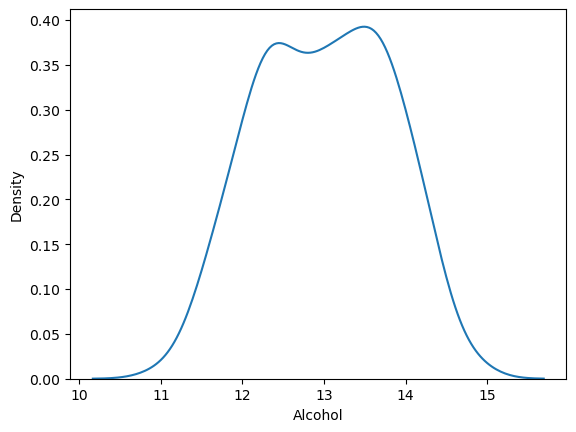

In [51]:
sns.kdeplot(df['Alcohol'])

<Axes: xlabel='Malic Acid', ylabel='Density'>

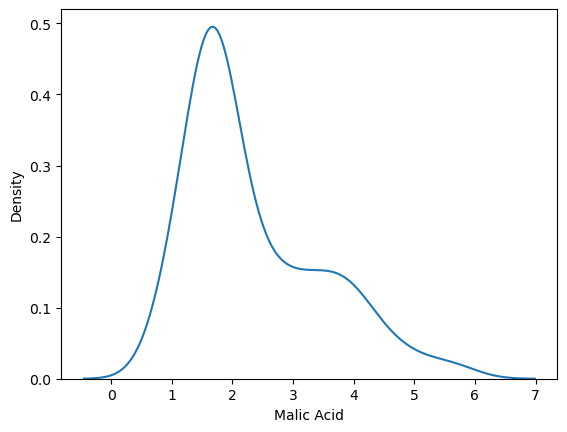

In [52]:
sns.kdeplot(df['Malic Acid'])

### **Importing scikit learn for train-test split**

In [53]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [55]:
X_train.shape , X_test.shape

((124, 2), (54, 2))

In [56]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# fit the scaler to the train set, it will learn the parameters
# fitting is always done on training set
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [57]:
X_train_scaled , X_test_scaled  # After the scaling we get numpy array as output so we need to convert it to DataFrame

(array([[0.53216374, 0.50592885],
        [0.3245614 , 0.33399209],
        [0.48538012, 0.15019763],
        [0.30409357, 0.45256917],
        [0.71052632, 0.66798419],
        [0.57894737, 0.20355731],
        [0.64619883, 0.83201581],
        [0.26900585, 0.07114625],
        [0.11988304, 0.19367589],
        [0.66081871, 0.10079051],
        [0.79532164, 0.66403162],
        [0.80409357, 0.34980237],
        [0.5497076 , 0.243083  ],
        [0.19590643, 0.26482213],
        [0.12573099, 0.42490119],
        [0.60526316, 0.21146245],
        [0.62865497, 0.19565217],
        [0.28070175, 0.03952569],
        [0.66374269, 0.21541502],
        [0.32748538, 0.94268775],
        [0.70467836, 0.19960474],
        [0.47953216, 0.20355731],
        [0.4619883 , 0.18379447],
        [0.11111111, 0.27470356],
        [0.86842105, 0.56324111],
        [0.62865497, 0.1916996 ],
        [0.34795322, 0.33992095],
        [0.47953216, 0.25889328],
        [0.58187135, 0.76284585],
        [0.377

In [58]:
X_train_scaled = pd.DataFrame(X_train_scaled,columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled,columns = X_test.columns)

## **This is normalization because MinMaxScaler is used:**
### In Normalization the data is squeezed between 0 to 1, thus the min value of the data is 0 and max value is 1

In [59]:
np.round(X_train_scaled.describe(),2) # Numpy round function is just used to round off the data to two digits

,Alcohol,Malic Acid
count,124.00,124.00
mean,0.48,0.30
std,0.24,0.20
min,0.00,0.00
25%,0.28,0.18
50%,0.48,0.21
75%,0.67,0.40
max,1.00,1.00


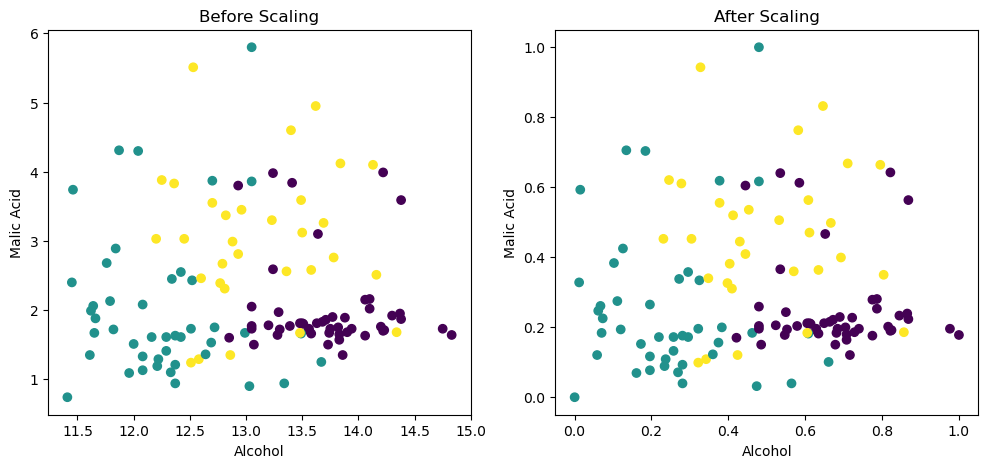

In [60]:
# Showing that data is just scaled not changed
# subplot function is used to create 2 plots side by side
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# Scatter plot before scaling
ax1.scatter(X_train['Alcohol'], X_train['Malic Acid'], c=y_train, cmap='viridis')
ax1.set_title("Before Scaling")
ax1.set_xlabel("Alcohol")
ax1.set_ylabel("Malic Acid")

# Scatter plot after scaling
ax2.scatter(X_train_scaled['Alcohol'], X_train_scaled['Malic Acid'], c=y_train, cmap='viridis')
ax2.set_title("After Scaling")
ax2.set_xlabel("Alcohol")
ax2.set_ylabel("Malic Acid")

plt.show()

<Axes: title={'center': 'After Standard Scaling'}, xlabel='Alcohol', ylabel='Density'>

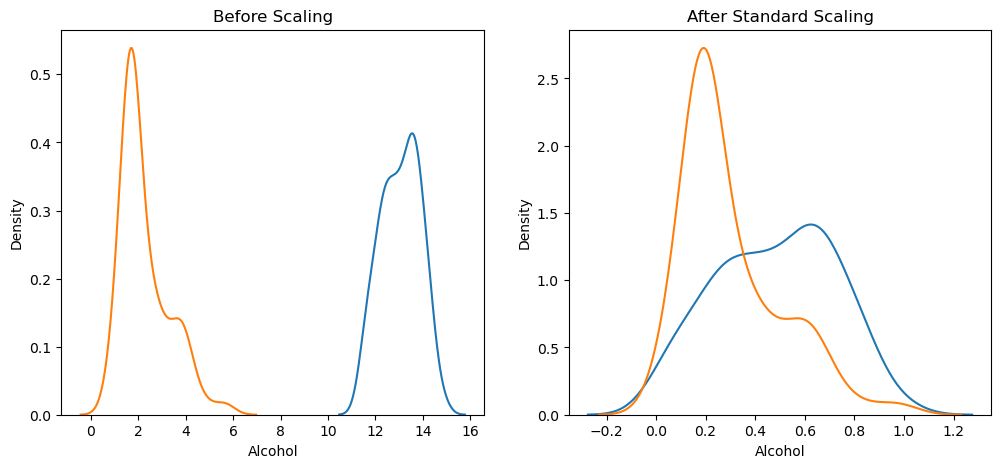

In [61]:
# plotting pdf
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize = (12,5))

# Before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Alcohol'], ax=ax1)
sns.kdeplot(X_train['Malic Acid'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['Alcohol'], ax=ax2)
sns.kdeplot(X_train_scaled['Malic Acid'], ax=ax2)